In [108]:
!wget https://github.com/daniel-e/mnist_octave/blob/master/mnist.mat?raw=true
import scipy.io
from scipy.stats import mode
from scipy.spatial import distance_matrix
!mv mnist.mat?raw=true mnist.mat
mat = scipy.io.loadmat('mnist.mat')

--2021-10-31 09:00:27--  https://github.com/daniel-e/mnist_octave/blob/master/mnist.mat?raw=true
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/daniel-e/mnist_octave/raw/master/mnist.mat [following]
--2021-10-31 09:00:27--  https://github.com/daniel-e/mnist_octave/raw/master/mnist.mat
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/daniel-e/mnist_octave/master/mnist.mat [following]
--2021-10-31 09:00:27--  https://raw.githubusercontent.com/daniel-e/mnist_octave/master/mnist.mat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK


In [109]:
import numpy as np 
import matplotlib.pyplot as plt
from numpy.random import randint

testX= mat['testX']
testY = np.squeeze(mat['testY'])
trainX= mat['trainX']
trainY = np.squeeze(mat['trainY'])

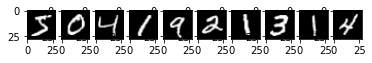

In [110]:
import matplotlib.pyplot as plt

im_ix = 20

fig, ax = plt.subplots(1, 10)

for col in range(10):
  im = trainX[col]
  im = np.reshape(im, (28, 28))
  ax[col].imshow(im, cmap='gray')


In [111]:
nr_test = 1000
x = []
y = []
for nr_train in range (2000, 12000, 2000):
  dist = np.zeros((nr_train, nr_test))

  dist = distance_matrix(trainX[:nr_train, :], testX[:nr_test, :])
  predictions = np.zeros(nr_test)
  for test_ix in range(nr_test):
    smallest_value_index = np.argsort(dist[:, test_ix])
    predictions[test_ix] = trainY[smallest_value_index[0]]

    predictions = predictions.astype(np.int64)

  difference = predictions - testY[:nr_test]
  percentage_success = (np.sum((difference == 0) * 1) / nr_test) * 100

  print("For training set of size: %d with fixed size of %d test sample, the percantage correct was: %.3f%%."%(nr_train, nr_test, percentage_success))
  
  y.append(percentage_success)
  x.append(nr_train)


For training set of size: 2000 with fixed size of 1000 test sample, the percantage correct was: 87.300%.
For training set of size: 4000 with fixed size of 1000 test sample, the percantage correct was: 89.500%.
For training set of size: 6000 with fixed size of 1000 test sample, the percantage correct was: 90.400%.
For training set of size: 8000 with fixed size of 1000 test sample, the percantage correct was: 90.700%.
For training set of size: 10000 with fixed size of 1000 test sample, the percantage correct was: 92.000%.


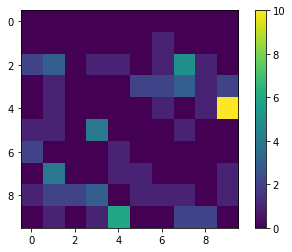

In [112]:
cMatrix = np.zeros((10,10))
for ix in range(nr_test):
  cMatrix[testY[ix], predictions[ix]] += 1
cMatrix = np.multiply(cMatrix, 1 - np.eye(10))

plt.imshow(cMatrix)
plt.colorbar()

In [114]:
from sklearn.metrics import confusion_matrix
testerY = []
for ix in range(nr_test):
  testerY.append(testY[ix])
confusionMatrix = confusion_matrix(testerY, predictions)


In [115]:
print(confusion_matrix(testerY, predictions))

[[ 85   0   0   0   0   0   0   0   0   0]
 [  0 125   0   0   0   0   1   0   0   0]
 [  2   3 102   1   1   0   1   5   1   0]
 [  0   1   0  96   0   2   2   3   1   2]
 [  0   1   0   0  97   0   1   0   1  10]
 [  1   1   0   4   0  80   0   1   0   0]
 [  2   0   0   0   1   0  84   0   0   0]
 [  0   4   0   0   1   1   0  92   0   1]
 [  1   2   2   3   0   1   1   1  77   1]
 [  0   1   0   1   6   0   0   2   2  82]]


In [117]:
from sklearn.metrics import classification_report

print(classification_report(testerY, predictions))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        85
           1       0.91      0.99      0.95       126
           2       0.98      0.88      0.93       116
           3       0.91      0.90      0.91       107
           4       0.92      0.88      0.90       110
           5       0.95      0.92      0.94        87
           6       0.93      0.97      0.95        87
           7       0.88      0.93      0.91        99
           8       0.94      0.87      0.90        89
           9       0.85      0.87      0.86        94

    accuracy                           0.92      1000
   macro avg       0.92      0.92      0.92      1000
weighted avg       0.92      0.92      0.92      1000



In [ ]:
blop = []
row = 0
col = 0
val = []
for i in confusionMatrix:
  flag = 0
  for j in i:
    flag += j
    if row == col:
      val.append(j)
    col += 1
  blop.append(flag)
  row +=1
  col = 0

print(blop)
print(val)

In [ ]:
newY = []

for s in y:
  newY.append(s/100)

In [ ]:
fig = plt.figure();
ax = fig.add_subplot(1,1,1)
ax.set_xlabel("Training Size")
ax.set_ylabel("Percentage Correct")
ax.set_title("Euclidean Distance")
ax.plot(x,newY)

In [ ]:
nr_train = 1000
x = []
y = []
for nr_test in range (1000, 8000, 1000):
   = np.zeros((nr_train, nr_test))
  t = time.time()

  D = distance_matrix(trainX[:nr_train, :], testX[:nr_test, :])
  predictions = np.zeros(nr_test)
  for test_ix in range(nr_train):
    smallest_value_index = np.argsort(D[:, test_ix])
    predictions[test_ix] = trainY[smallest_value_index[0]]

    predictions = predictions.astype(np.int64)

  difference = predictions - testY[:nr_test]
  percentage_success = (np.sum((difference == 0) * 1) / nr_test) * 100

  print("For test set of size: %d with fixed size of %d training sample, the percantage correct was: %.3f%%."%(nr_test, nr_train, percentage_success))
  
  y.append(percentage_success)
  x.append(nr_test)


In [ ]:
newY = []

for s in y:
  newY.append(s/100)

In [ ]:
fig = plt.figure();
ax = fig.add_subplot(1,1,1)
ax.set_xlabel("Testing Size")
ax.set_ylabel("Percentage Correct")
ax.set_title("Euclidean Distance")
ax.plot(x,newY)

In [ ]:
import pandas as pd
y_actu = pd.Series([2, 0, 2, 2, 0, 1, 1, 2, 2, 0, 1, 2], name='Actual')
y_pred = pd.Series([0, 0, 2, 1, 0, 2, 1, 0, 2, 0, 2, 2], name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)

print(df_confusion)